<a href="https://colab.research.google.com/github/sebagit914/Challenge01/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Librerías

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importar regresión libreria regresión lineal
from sklearn.linear_model import LinearRegression


# Montar datos

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cargar conjunto de datos

In [11]:
filename = '/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/bostonHousing1978.csv'
df = pd.read_csv(filename)
df.head()

,RM,LSTAT,PTRATIO,target
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [12]:
df.rename(columns={'target': 'price'}, inplace = True)
df.head()

,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [13]:
df.shape

(506, 4)

In [14]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
price      0
dtype: int64

# EDA

Correlación

Un beneficio del modelado es la capacidad de razonar sobre cientos de características a la vez. No hay límite para la cantidad de funciones que se pueden usar. Sin embargo, a menudo, un pequeño conjunto de características explica la mayor parte de la varianza (suponiendo que existe una relación lineal). Una forma relativamente buena de elegir características es trazar una matriz de correlación (aunque con muchas variables, la matriz puede resultar ser un poco abrumadora).

In [15]:
df.corr()

,RM,LSTAT,PTRATIO,price
RM,1.000000,-0.613808,-0.355501,0.695360
LSTAT,-0.613808,1.000000,0.374044,-0.737663
PTRATIO,-0.355501,0.374044,1.000000,-0.507787
price,0.695360,-0.737663,-0.507787,1.000000


In [17]:
df.corr().sort_values(by = ['price'])

,RM,LSTAT,PTRATIO,price
LSTAT,-0.613808,1.000000,0.374044,-0.737663
PTRATIO,-0.355501,0.374044,1.000000,-0.507787
RM,1.000000,-0.613808,-0.355501,0.695360
price,0.695360,-0.737663,-0.507787,1.000000


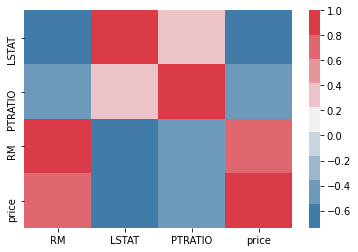

In [19]:
# Puede utilizar un mapa de calor para facilitar (en teoría) la lectura de la matriz de correlación
sns.heatmap(df.corr().sort_values(by = ['price']), cmap = sns.diverging_palette(240, 10, n=9))

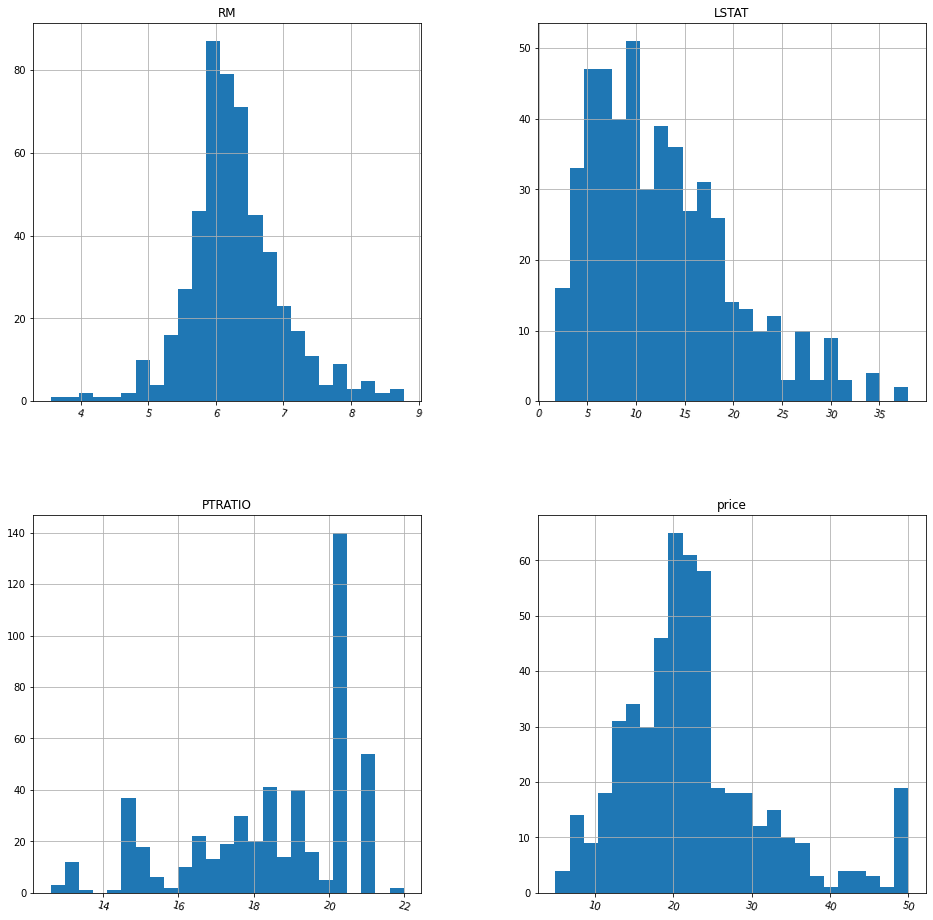

In [20]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

In [21]:
df['price'].unique()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

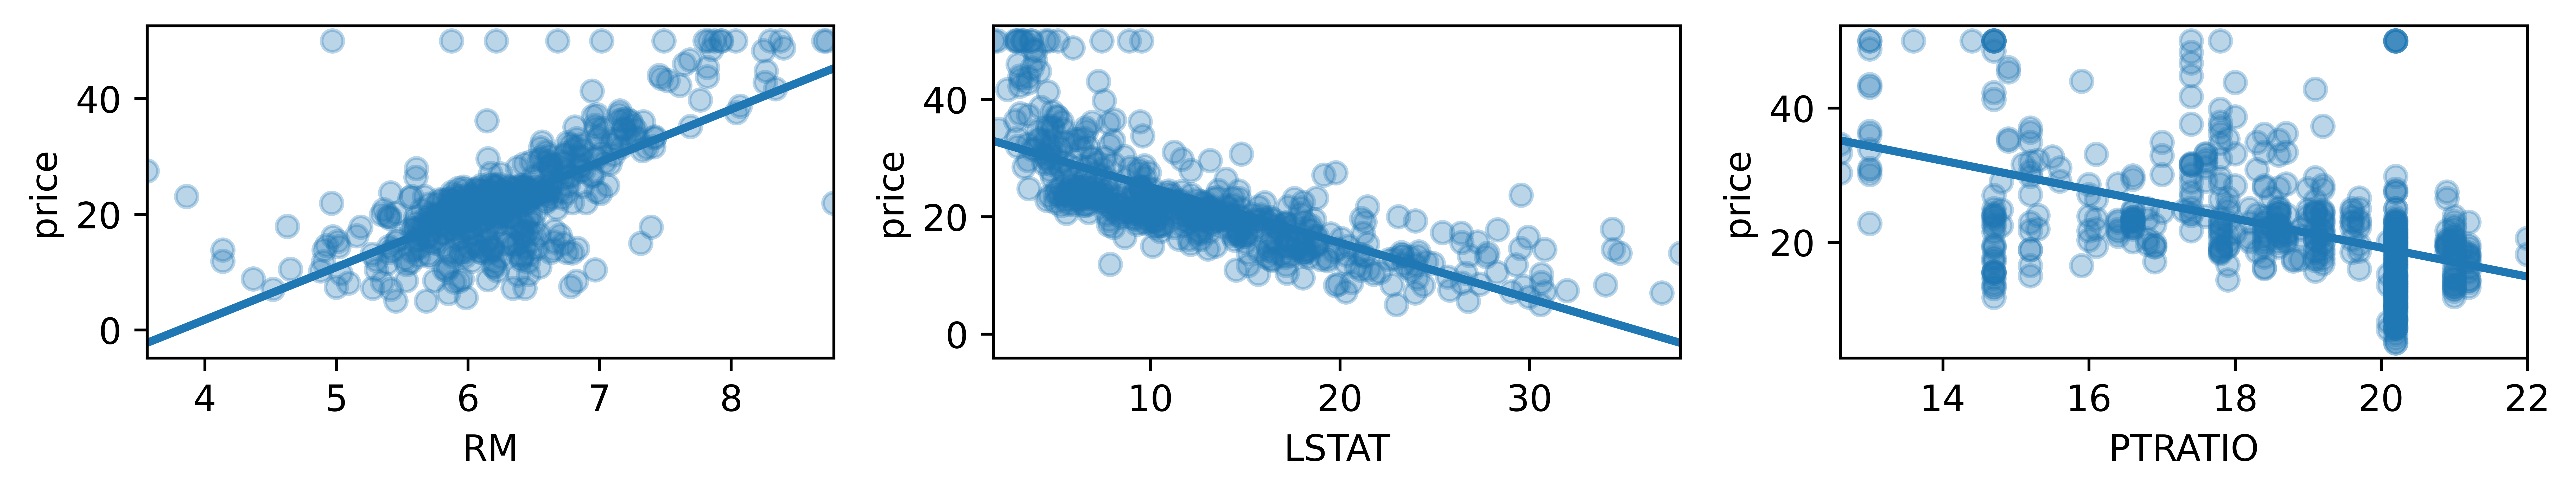

In [22]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=1000)
sns.regplot(x='RM', y='price', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='LSTAT', y='price', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='PTRATIO', y='price', data=df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
fig.tight_layout()

# Org de datos en la matriz de características y el vector de destino

In [23]:
#Aquí sacamos nuestra matriz de datos, dejando sólo las columnas que necesitamos entrenar
X = df.loc[:, ['RM', 'LSTAT', 'PTRATIO']].values

In [24]:
X.shape

(506, 3)

In [26]:
# vector de destino. Variable de salida o definida como OUTPUT
y = df.loc[:, 'price'].values

In [27]:
y.shape

(506,)

# IMPORTAR MODELO


Paso 1: Modelo importado en punto 1.

Paso 2: Crear una instancia del modelo

Este es un lugar donde puedes ajustar los hiperparámetros de un modelo. En el caso de una regresión lineal, puedes fijar «fit_intercept» como True o False dependiendo de tus necesidades. Este es un concepto importante, pues modelos más complejos poseen más elementos que puedes ajustar. La imagen inferior no es nada más que un ejemplo de lo que significa interceptar.

In [28]:
# Hacer una instancia de regresión lineal
reg = LinearRegression(fit_intercept=True)

In [29]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Paso 3

In [30]:
#Paso 3: Entrenar el modelo en los datos, almacenando la información aprendida.

#El modelo está aprendiendo sobre la relación entre x e y.

reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#Desde aquí podemos comenzar a observar las metricas de precisión del modelo
preds = reg.predict(X)

Paso 4: Predecir los valores de nuevos datos. Usa la información que el modelo aprendió durante el proceso de entrenamiento.

In [20]:


#Predecir por una observación (no te preocupes si la parte de reformación es muy difícil de entender).

# La entrada debe ser bidimensional (la remodelación hace que la entrada sea bidimensional)
reg.predict(X[0].reshape(-1,3))

array([31.16835679])

In [21]:
#Predecir para observaciones múltiples a la vez

reg.predict(X[0:10])

array([31.16835679, 25.76746391, 32.13917258, 31.08040676, 30.38658889,
       27.21764876, 24.45929468, 21.33922781, 12.73231976, 21.75283875])

# Midiendo el desempeño del modelo

A diferencia de la clasificación de modelos, donde una métrica común significa precisión, los modelos de regresión utilizan otras métricas, tales como R^2, el coeficiente de determinación para cuantificar el desempeño de tu modelo. El mejor puntaje posible es 1.0. Un modelo constante que siempre predice el valor esperado de y, ignorando las funciones de input, haría que R^2 obtenga un puntaje de 0.0.

In [36]:
#Aqui no usamos sklearn 
score = reg.score(X, y)
print(score)

0.6786241601613111


Ecuación Linear Regression 

In [23]:
reg.intercept_

18.567111505395236

In [24]:
m1 = reg.coef_[0]
m2 = reg.coef_[1]
m3 = reg.coef_[2]
b = reg.intercept_
# siguiendo la forma de intersección de pendiente
print("formula: y = {:.2f}*RM + {:.2f}*LSTAT + {:.2f}*'PTRATIO + {:.2f}".format(m1,m2,m3,b) )

formula: y = 4.52*RM + -0.57*LSTAT + -0.93*'PTRATIO + 18.57


# Metricas de precisión

In [33]:
from sklearn.metrics import r2_score

In [35]:
#Coeficiente de determinacion usando el modelo
r2_score(y,preds)

0.6786241601613111

INTERPRETATION : 67% if the variaton in my target  in housing price can be explain by my model , RM LSTAT and PTRATION

# Mean absolute error

In [37]:
#BY HAND
np.sum(np.abs(y - preds))/len(preds)

3.6417936968390845

In [39]:
#using sklearn
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, preds)

3.6417936968390845

interpretation:  On average, our model is incorrect by about 3.6 thousand dollar

# Mean Squared Error ( MSE)

In [41]:
#By hand
np.sum((y-preds)**2)/len(preds)

27.130405758497062

In [42]:
#using Sklearn
from sklearn.metrics import mean_squared_error


In [43]:
mean_squared_error(y, preds)

27.130405758497062

Interpretation:  On average our model is incorrect by about 27.1 squared units.

# Root Mean Squared Error (RMSE)

In [45]:
#by hand
np.sqrt(np.sum((y-preds)**2)/len(preds))

5.208685607569059

In [46]:
#using sklearn
np.sqrt(mean_squared_error(y,preds))

5.208685607569059

Interpretation: On average our model is incorrect by about 4.23 thousand dollars.
Note: This metrics penailzes larger errors more than MAE